# Community Detection

---

In [28]:
import sys

sys.path.insert(0, "../")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import networkx as nx
from matplotlib.colors import to_hex
from networkx.algorithms import community
import scripts.community_features as cf
import scripts.get_graph as gg

---

## Get co-occurrence matrix

In [29]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../../dataset/large_adjacency_matrix.csv", compression='gzip').values

# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)
# Display the co-occurrence matrix
print("Co-occurrence Matrix (Disease-Disease):")
print(co_occurrence_matrix_d)
# Get the graph
G_d = gg.get_weighted_graph(co_occurrence_matrix_d)

# Compute co-occurrence matrix symptoms-symptoms
co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)
# Display the co-occurrence matrix
print("Co-occurrence Matrix (Symptom-Symptom):")
print(co_occurrence_matrix_s)
# Get the graph
G_s = gg.get_weighted_graph(co_occurrence_matrix_s)

Co-occurrence Matrix (Disease-Disease):
[[ 6  1  0 ...  0  1  0]
 [ 1 10  0 ...  0  1  0]
 [ 0  0  8 ...  1  0  1]
 ...
 [ 0  0  1 ...  3  0  0]
 [ 1  1  0 ...  0  9  0]
 [ 0  0  1 ...  0  0  3]]
Co-occurrence Matrix (Symptom-Symptom):
[[ 47  28   7 ...   0   0   0]
 [ 28  48   3 ...   0   0   0]
 [  7   3 101 ...   0   0   0]
 ...
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]


---

## Identify communities

#### **Approach 1**: Hierarchical clustering

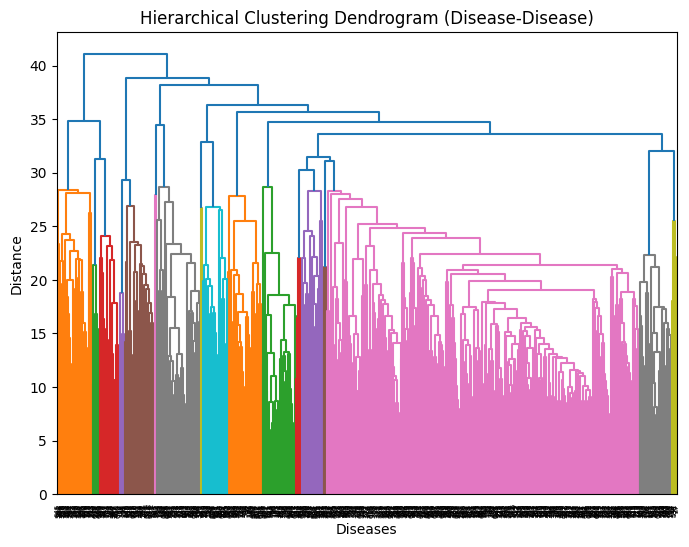

Cluster labels (Disease-Disease):
[4 4 2 4 2 4 4 4 3 3 2 2 2 4 4 1 2 1 4 2 4 4 4 4 4 4 4 4 4 3 4 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 2 4 1 4 4 4 4 4 2 4 4 3 4 4 4 3 4 4 4 4 4 4 3 4 4 4 4
 1 4 4 4 1 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 4 4 4 4 4 4 1 3 4 4 4 4 4 4 1
 4 3 4 1 1 4 4 4 4 1 4 4 4 4 2 2 4 1 4 2 4 4 4 3 4 4 2 4 4 4 4 4 4 4 4 2 4
 4 3 4 4 4 4 4 4 1 2 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 3 4 2 4 4 1 4 4 4 2
 4 4 4 4 4 4 4 4 4 4 4 1 1 4 4 4 4 4 4 4 3 1 4 4 3 4 2 2 4 1 4 3 4 4 4 4 4
 4 4 1 4 3 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1 4 3 4 4 4 4 2 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 1 4 4 1 1 1 1 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 1 4 2 1 3 4 4 4 4 4 4 4 4
 4 4 4 1 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 1 1 4 4 1 1 1 4 1 4 1 1 3 4 1 1 4 1
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 2 3 4 1 1 1 4 4 4 4 4 4 1 1 4 3 4 4 4 4
 4 4 4 1 4 4 4 2 4 4 4 4 4 3 3 4 1 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
 4 2 4 4 4 4 1 4 1 3 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4

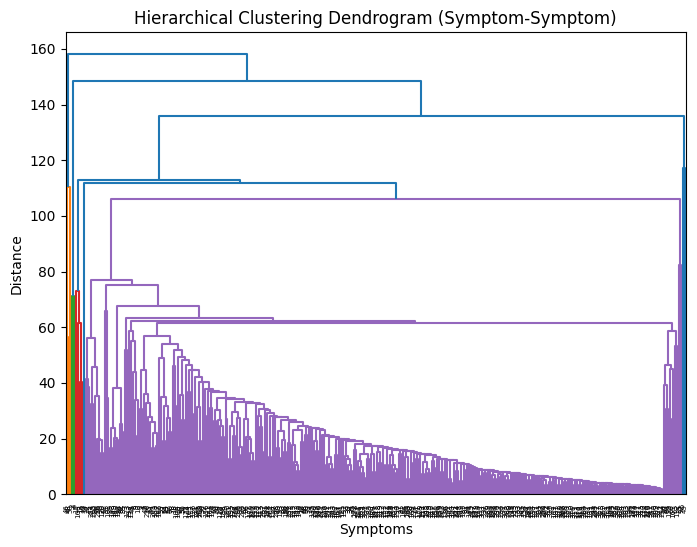

Cluster labels (Symptom-Symptom):
[3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 1 3 1 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [30]:
# ----------------------------- DISEASES -----------------------------

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_d, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Disease-Disease)")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

distance_threshold = 4
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='maxclust')
print("Cluster labels (Disease-Disease):")
print(cluster_labels)


# ----------------------------- SYMPTOMS -----------------------------

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_s, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Symptom-Symptom)")
plt.xlabel("Symptoms")
plt.ylabel("Distance")
plt.show()

distance_threshold = 4
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='maxclust')
print("Cluster labels (Symptom-Symptom):")
print(cluster_labels)


#### **Approach 2**: Greedy modularity maximization

Communities: [frozenset({0, 2, 3, 4, 7, 10, 11, 12, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 32, 34, 35, 38, 39, 40, 41, 42, 44, 45, 47, 48, 50, 52, 53, 54, 55, 57, 60, 61, 65, 66, 70, 72, 75, 76, 86, 95, 97, 98, 102, 104, 106, 114, 115, 116, 122, 123, 125, 126, 129, 130, 132, 137, 139, 140, 141, 142, 143, 150, 154, 155, 156, 157, 159, 161, 163, 164, 170, 171, 174, 176, 177, 178, 179, 180, 195, 197, 198, 199, 200, 201, 202, 203, 204, 206, 208, 210, 211, 212, 213, 214, 218, 220, 221, 229, 230, 233, 234, 235, 236, 237, 238, 240, 243, 249, 250, 251, 253, 255, 256, 257, 272, 274, 278, 280, 283, 284, 285, 286, 287, 291, 292, 295, 296, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 314, 319, 320, 323, 325, 328, 329, 331, 332, 333, 335, 337, 338, 339, 340, 342, 343, 344, 346, 347, 348, 349, 350, 351, 352, 353, 354, 356, 363, 365, 366, 369, 373, 376, 386, 387, 390, 391, 393, 394, 395, 398, 399, 401, 403, 406, 408, 409, 412, 413, 414, 416, 417, 423, 425, 426, 431, 432, 434, 43

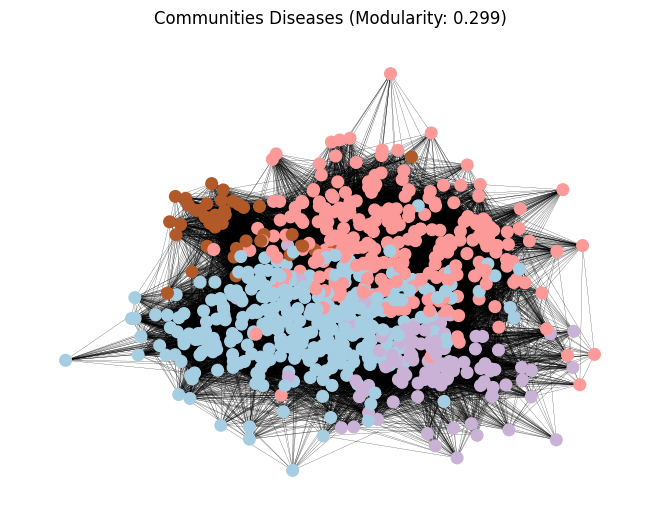

In [31]:
# --------------------------- DISEASES -----------------------------

# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G_d))
print("Communities:", communities)
modularity = nx.community.modularity(G_d, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})

# Draw the graph with node coloration keeping kamada_kawai_layout to compare it with the original one with no clusters
# pos = nx.kamada_kawai_layout(G_d)  # You can choose other layout algorithms
# nx.draw(
#         G_d, 
#         pos, 
#         node_color=list(color_map.values()),
#         with_labels=False, 
#         cmap=plt.cm.Paired,
#         node_size=70,
#         width=0.15,
#         )
        
# plt.title("Communities Diseases (Modularity: {:.3f})".format(modularity))
# plt.show()


# Plot another version of the graph with communities grouped together
pos = nx.spring_layout(G_d)  # You can use a different layout if needed

# Draw nodes and edges
nx.draw(
    G_d, 
    pos, 
    node_color=[color_map[node] for node in G_d.nodes()], 
    with_labels=False, 
    cmap='Paired', 
    node_size=70,
    width=0.15,
    )

# Add labels and title
plt.title("Communities Diseases (Modularity: {:.3f})".format(modularity))
plt.show()

Communities: [frozenset({0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 23, 24, 27, 28, 29, 30, 32, 35, 36, 38, 39, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 95, 96, 97, 98, 100, 101, 102, 110, 122, 127, 128, 131, 134, 135, 136, 137, 138, 139, 140, 141, 156, 157, 158, 161, 175, 176, 177, 178, 180, 182, 184, 191, 193, 194, 195, 197, 198, 200, 201, 202, 203, 205, 206, 207, 209, 210, 217, 221, 222, 230, 231, 232, 233, 240, 241, 242, 243, 244, 245, 246, 252, 266, 268, 270, 271, 273, 278, 279, 281, 283, 288, 289, 290, 291, 294, 296, 297, 299, 300, 303, 305, 308, 309, 310, 311, 313, 314, 325}), frozenset({256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 12, 13, 14, 269, 15, 16, 17, 19, 18, 20, 21, 276, 22, 280, 282, 285, 287, 37, 295, 40, 41, 301, 302, 304, 49, 306, 307, 312, 316, 318, 319, 324, 326, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 99, 103, 104, 105, 106, 107, 108, 109, 111, 120, 121, 126, 133, 142, 143, 144, 145, 146, 1

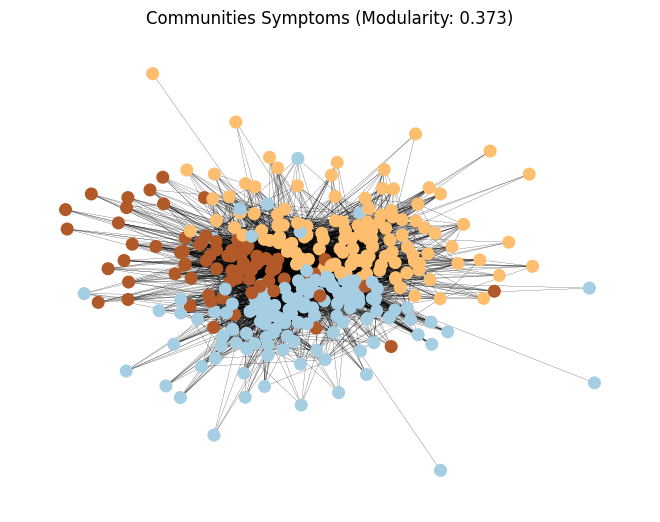

In [32]:
# ----------------------------- SYMPTOMS -----------------------------


# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G_s))
communities_greedy_mod = communities
print("Communities:", communities)
modularity = nx.community.modularity(G_s, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})
    

# Draw the graph with node coloration keeping kamada_kawai_layout to compare it with the original one with no clusters
# pos = nx.kamada_kawai_layout(G_s)  # You can choose other layout algorithms
# nx.draw(
#     G_s, pos, 
#     node_color=list(color_map.values()), 
#     with_labels=False, 
#     cmap=plt.cm.Paired,
#     node_size=70,
#     width=0.15,
#     )

# plt.title("Communities Symptoms (Modularity: {:.3f})".format(modularity))
# plt.show()


# Plot another version of the graph with communities grouped together
pos = nx.spring_layout(G_s)  # You can use a different layout if needed

# Draw nodes and edges
nx.draw(
    G_s, 
    pos, 
    node_color=[color_map[node] for node in G_s.nodes()], 
    with_labels=False, 
    cmap='Paired', 
    node_size=70,
    width=0.15,
    )

# Add labels and title
plt.title("Communities Symptoms (Modularity: {:.3f})".format(modularity))
plt.show()

#### **Approach 3**: Girvan-Newman algorithm

In [33]:
# # ----------------------------- DISEASES -----------------------------

# # Compute co-occurrence matrix disease-disease
# co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)

# # Display the co-occurrence matrix
# print("Co-occurrence Matrix (Disease-Disease):")
# print(co_occurrence_matrix_d)

# # Create a weighted graph directly
# G = nx.Graph()

# # Add nodes to the graph
# num_nodes = co_occurrence_matrix_d.shape[0]
# G.add_nodes_from(range(num_nodes))

# # Add weighted edges to the graph
# for i in range(num_nodes):
#     for j in range(i+1, num_nodes):
#         weight = co_occurrence_matrix_d[i, j]
#         if weight != 0:
#             G.add_edge(i, j, weight=weight)

# communities = list(nx.community.girvan_newman(G))

# # Modularity -> measures the strength of division of a network into modules
# modularity_df = pd.DataFrame(
#     [
#         [k + 1, nx.community.modularity(G, communities[k])]
#         for k in range(len(communities))
#     ],
#     columns=["k", "modularity"],
# )


# fig, ax = plt.subplots(3, figsize=(15, 20))

# # Plot graph with colouring based on communities
# cf.visualize_communities(G, communities[0], 1)
# cf.visualize_communities(G, communities[39], 2)

# # Plot change in modularity as the important edges are removed
# modularity_df.plot.bar(
#     x="k",
#     ax=ax[2],
#     color="#F2D140",
#     title="Modularity Trend for Girvan-Newman Community Detection",
# )
# plt.show()


In [34]:
# # ----------------------------- SYMPTOMS -----------------------------

# # Compute co-occurrence matrix disease-disease
# co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)

# # Display the co-occurrence matrix
# print("Co-occurrence Matrix (Symptom-Symptom):")
# print(co_occurrence_matrix_s)

# # Create a weighted graph directly
# G = nx.Graph()

# # Add nodes to the graph
# num_nodes = co_occurrence_matrix_s.shape[0]
# G.add_nodes_from(range(num_nodes))

# # Add weighted edges to the graph
# for i in range(num_nodes):
#     for j in range(i+1, num_nodes):
#         weight = co_occurrence_matrix_s[i, j]
#         if weight != 0:
#             G.add_edge(i, j, weight=weight)

# communities = list(nx.community.girvan_newman(G))

# # Modularity -> measures the strength of division of a network into modules
# modularity_df = pd.DataFrame(
#     [
#         [k + 1, nx.community.modularity(G, communities[k])]
#         for k in range(len(communities))
#     ],
#     columns=["k", "modularity"],
# )


# fig, ax = plt.subplots(3, figsize=(15, 20))

# # Plot graph with colouring based on communities
# cf.visualize_communities(G, communities[0], 1)
# cf.visualize_communities(G, communities[2], 2)

# # Plot change in modularity as the important edges are removed
# modularity_df.plot.bar(
#     x="k",
#     ax=ax[2],
#     color="#F2D140",
#     title="Modularity Trend for Girvan-Newman Community Detection",
# )
# plt.show()

---

## Community Features Extraction

**Girvan-Newman** --> list of tuples of sets. Each set represents a community. Each tuple a level in the dendrogram.

**Greedy Modularity** --> list of frozensets. Each set represents a community.

#### **Community Membership**: Vector representing the count of symptoms for each community.
#### **Community Size**: The number of symptoms or diseases in a community.

In [35]:
# Creates features for all the samples and store in npz

# METHOD USED TO GET COMMUNITIES: GREEDY MODULARITY

data_onehot = pd.read_csv("../../dataset/large_one_hot_encoding.csv", compression='gzip')
data_onehot = data_onehot.drop("Unnamed: 0", axis=1)
data_onehot_y = data_onehot["Disease"].values
data_onehot_x = data_onehot.drop("Disease", axis=1).values


# COMMUNITY COUNT
comm_count_matrix = np.zeros((data_onehot_x.shape[0], len(communities_greedy_mod)))
for i in range(data_onehot_x.shape[0]):
    comm_count_matrix[i] = cf.get_community_count(data_onehot_x[i], communities_greedy_mod)

np.savez_compressed("../prediction_model/features/community_count.npz", X=comm_count_matrix, y=data_onehot_y)

# COMMUNITY SIZE
comm_size_matrix = np.zeros((data_onehot_x.shape[0], data_onehot_x.shape[1]))
for i in range(data_onehot_x.shape[0]):
    comm_size_matrix[i] = cf.get_community_size(data_onehot_x[i], communities_greedy_mod)

np.savez_compressed("../prediction_model/features/community_size.npz", X=comm_size_matrix, y=data_onehot_y)

In [36]:
data_count = np.load("../prediction_model/features/community_count.npz")
xc, yc = data_count["X"], data_count["y"]
print(xc.shape, yc.shape)

data_size = np.load("../prediction_model/features/community_size.npz")
xs, ys = data_size["X"], data_size["y"]
print(xs.shape, ys.shape)

(246945, 3) (246945,)
(246945, 328) (246945,)


In [37]:
# Replace the community numbers with the community names
names = data_onehot.columns.values.tolist()[:-1]
community_names = []
communities_with_names = []
for comm_number, community in enumerate(communities_greedy_mod):
    for node in community:
        comm_name = names[node]
        community_names.append(comm_name)
    communities_with_names.append(community_names)